In [1]:
import pandas as pd
import numpy as np
from taigapy import create_taiga_client_v3
import statsmodels.api as sm
import networkx as nx
from sklearn import preprocessing
import matplotlib.pyplot as plt


# Import and prepare data

In [2]:
# read in dependency matrix of interest
e3_tf_corr = pd.read_pickle("pydata/tf_dependency_e3ls_expr_correlation.pkl")

In [34]:
e3_tf_corr.loc[(e3_tf_corr['TF'] == 'PAX3'),:]

,TF,E3_ligase,p-val,corr
634675,PAX3,KLHL40,2.171377e-62,-0.438620
636205,PAX3,KLHL41,7.787317e-37,-0.340979
408235,PAX3,TRIM63,1.667429e-27,-0.294608
475555,PAX3,ASB11,1.474402e-22,-0.266094
414355,PAX3,TRIM72,1.191177e-21,-0.260474
...,...,...,...,...
571945,PAX3,FBXO4,1.334221e-04,0.105632
60925,PAX3,BIRC3,6.340319e-05,0.110572
363865,PAX3,TRIM25,4.950930e-05,0.112170
599485,PAX3,GAN,3.770586e-05,0.113905


In [ ]:
# Keep only correlation within a specific threshold 
#filter dataframe
threshold = -0.3
e3_tf_corr_filtered=e3_tf_corr.loc[ abs(e3_tf_corr['corr'] < -threshold) , ['TF', 'E3_ligase', 'corr']]

In [73]:
e3_tf_corr_filtered

,TF,E3_ligase,corr
398849,SOX10,TRIM51,-0.725675
408029,SOX10,TRIM63,-0.674384
407051,MITF,TRIM63,-0.595795
135807,ISL1,MARCHF11,-0.558241
41093,MYB,KLHL6,-0.550724
...,...,...,...
334979,PAX5,SYVN1,-0.301141
691643,MYCN,SPSB4,-0.301122
572342,TCF3,FBXO40,-0.300719
356026,SOX9,TRIM2,-0.300202


# Make network plots

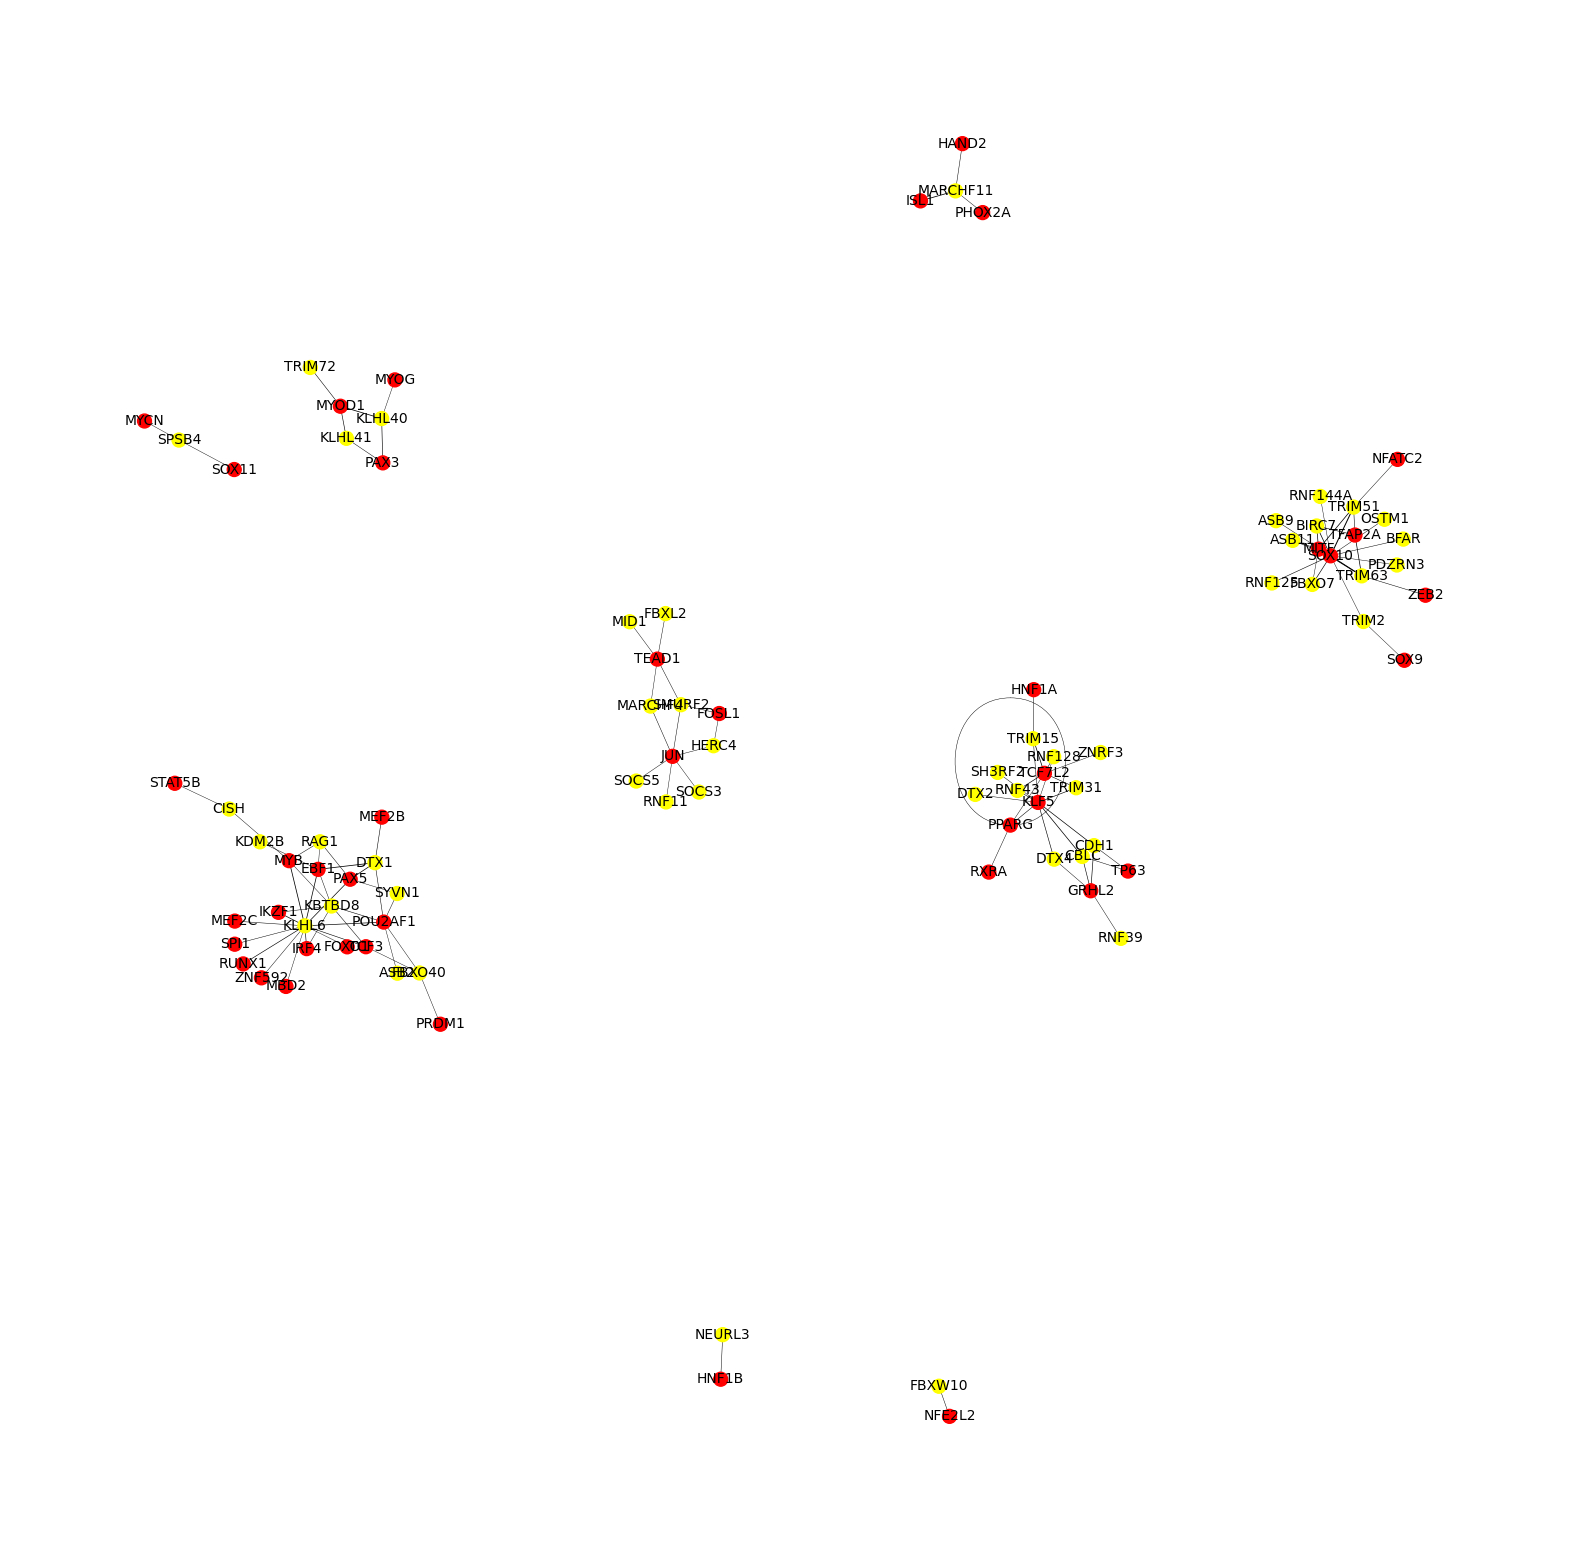

In [ ]:
G=nx.from_pandas_edgelist(e3_tf_corr_filtered, 'TF', 'E3_ligase')

# Get TFs and E3_ligases from the DataFrame
TFs = e3_tf_corr_filtered['TF'].unique()
E3_ligases = e3_tf_corr_filtered['E3_ligase'].unique()

# set node colors
all_nodes = list(G.nodes())
node_groups = {node: 'group1' if node in TFs else 'group2' for node in all_nodes}
nx.set_node_attributes(G, node_groups, name='group')
color_map = {'group1': 'red', 'group2': 'yellow'}
node_colors = [color_map[G.nodes[node]['group']] for node in G.nodes()]
 
# set edge thickness
edge_corr_values = e3_tf_corr_filtered.set_index(['TF', 'E3_ligase'])['corr'].to_dict()
nx.set_edge_attributes(G, edge_corr_values, name='corr')
edge_linewidths = [abs(G[u][v]['corr']) for u, v in G.edges()]

# Create the plot
fig, ax = plt.subplots(figsize=(20, 20))

# Plot the network with edge linewidths based on correlation strength
nx.draw(G, with_labels=True, node_color=node_colors, edge_color='black', 
        width=edge_linewidths*5, node_size=100, font_size=10, ax=ax)

# Show the plot
plt.show()